In [44]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
# This imports the NumPy library, which provides support for numerical operations, especially working with arrays.
# This imports pandas, a powerful library used for handling tabular data, like spreadsheets or databases


In [45]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df.shape

(5572, 2)

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# This line imports the LabelEncoder class from scikit-learn’s preprocessing module
# It's typically used when you need to convert categorical labels (like 'spam' or 'ham') into numerical form,

df['Category']=encoder.fit_transform(df['Category']) # to convert spam and ham to numerical values 0=ham and 1=spam


In [48]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [50]:
df.duplicated().sum() 
#check for duplicate values


415

In [51]:
df=df.drop_duplicates(keep='first')
# That line tells Python to remove any duplicate rows in your DataFrame df, and to keep only the first occurrence of each duplicate
# this remove the duplicate values thand then onkl

In [52]:
df.duplicated().sum()
# This creates a Series of Boolean values (True or False) for each row in df. If a row is an exact duplicate of a previous row,
# it will be marked as True.


0

In [53]:
df.shape
#  5,572 rows and 5 columns.
# tell the number of columns and rows

(5157, 2)

In [54]:
#check distribution of sapm and ham/real msg 0-->ham  1-->spam
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

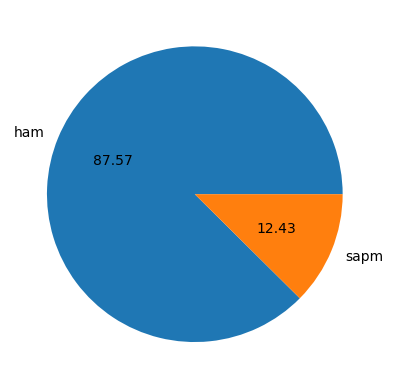

In [55]:
#represent it graphically
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','sapm'],autopct="%0.2f")
plt.show()

In [56]:
#Data is imbalanced ham is huge
import nltk
nltk.download('punkt')
# This imports the NLTK library, a toolkit that helps with working on human language data—like tokenizing, tagging, parsing, etc.
# . These are pre-trained models used to split text into sentences and words, a process known as tokenization.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
#length in terms of characters used in that sentence
df['num_characters']=df['Message'].apply(len)
df.sample(5)

# - This creates a new column in your DataFrame called 'num_characters'.
# - It uses .apply(len) to calculate the number of characters in each message (i.e. how long each text is).
# - So if a message is "Hello there!", the value in num_characters would be 12.



,Category,Message,num_characters
3633,0,Oooh I got plenty of those!,27
4466,0,CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I W...,95
4160,0,Now got tv 2 watch meh? U no work today?,40
1961,1,Guess what! Somebody you know secretly fancies...,156
241,0,Tomarrow final hearing on my laptop case so i ...,51


In [58]:
#fetch the number of words length
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
# - df['Message'] accesses the column containing your text messages.
# - .apply(lambda x: ...) applies a small anonymous function (called a lambda function) to each message.
# - nltk.word_tokenize(x) splits the message x into individual words and punctuation tokens using NLTK’s Punkt tokenizer.
# - len(...) then counts how many tokens are in each message.
# - The result is saved in a new column called 'num_words'.


In [59]:
df.sample(6)


,Category,Message,num_characters,num_words
3688,0,Great! I shoot big loads so get ready!,38,10
4516,0,That was random saw my old roomate on campus. ...,58,12
4315,0,Is ur changes 2 da report big? Cos i've alread...,82,19
2484,0,Mm have some kanji dont eat anything heavy ok,45,9
2603,0,So when you gonna get rimac access,34,8
4680,0,Sry da..jst nw only i came to home..,36,11


In [60]:
#fetch the number of sentences length
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [61]:
#description of msg on the basis of ham
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951506,17.250664,1.827724
std,56.732233,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
#description of msg on the basis of spam
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

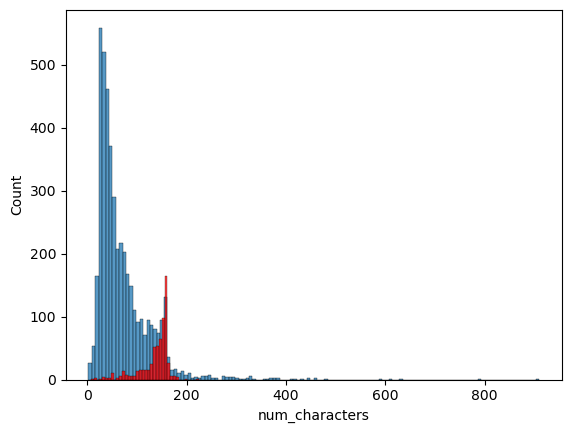

In [63]:
#to graphically understand the difference in msg
import seaborn as sns
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

# as we can observe that most of ham/real message are of 0 to 150 characters whereas
#spam most msg range from 160-190 characters approx

In [64]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [65]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Ensure that necessary NLTK packages are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()
# ps.stem("running") → "run"
# ps.stem("flies") → "fli"


def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    
    # Remove non-alphanumeric characters
    for i in text:
        if i.isalnum():
#             - True if all characters in the string are letters (A–Z, a–z) or digits (0–9)
                # - False if there's any symbol, punctuation, or whitespace

            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            # you often want to remove punctuation to simplify the input and focus only on words.
            # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

            y.append(i)
        
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

# Example usage
print(transform_text('HI GOOD BAD SAD Lopez %^*&&* IS ARE.Are you a funny person'))


hi good bad sad lopez funni person


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
df['transformed_text']=df['Message'].apply(transform_text)


In [67]:
df.sample(5)


,Category,Message,num_characters,num_words,num_sentences,transformed_text
4405,0,"Sorry, I'll call later &lt;#&gt; mins",38,14,1,sorri call later lt gt min
4327,0,That seems unnecessarily hostile,32,4,1,seem unnecessarili hostil
539,0,Ummmmmaah Many many happy returns of d day my ...,84,16,2,ummmmmaah mani mani happi return day dear swee...
1170,0,Msgs r not time pass.They silently say that I ...,146,33,2,msg r time silent say think u right also make ...
1070,0,Jus finish bathing...,21,4,1,ju finish bath


In [68]:
pip install wordcloud


In [69]:
#word cloud of msg
# visual representations of text data where the size of each word corresponds to its frequency or importance within the text.
#to understand which words are mostly used in spam and real message
# # It lets you generate word clouds—those awesome visualizations where the size of each word reflects 
# how often it appears in your text. It's a fun and insightful way to see what's most prominent in a set of documents
# , like SMS spam


from wordcloud import WordCloud
wc=WordCloud(width=600,min_font_size=15,height=600,background_color='black')

In [70]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))


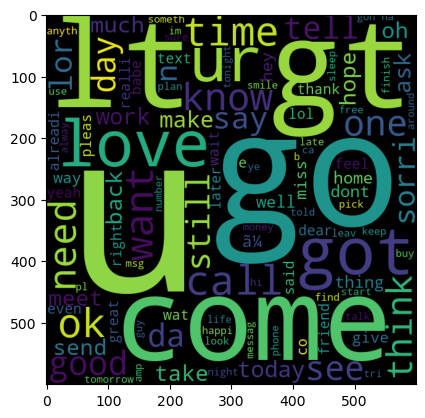

In [71]:
plt.imshow(ham_wc)


In [72]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))


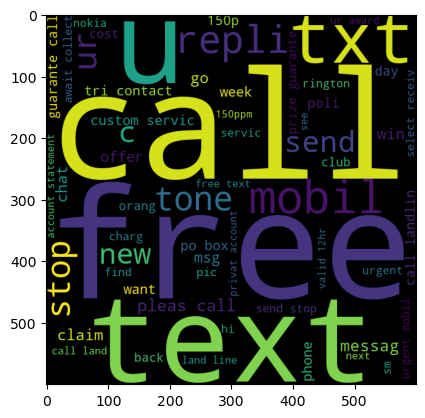

In [73]:
plt.imshow(spam_wc)


In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
# This converts a collection of text documents (like your messages) into a matrix of token counts. 
# Each word becomes a feature, and each row (message) gets a count of how often each word appears
# Message: "Spam spam ham"→ {'spam': 2, 'ham': 1}

tfidf=TfidfVectorizer(max_features=3000)
# This does something similar, but it uses a weighted approach called TF-IDF: 
# Term Frequency–Inverse Document Frequency.
# It doesn't just count words, it also considers how important a word is across all messages. Rare but relevant words get more weight.
# The max_features=3000 means it will only keep the top 3,000 most frequent and informative words, helping reduce complexity and noise in your model.


#since cv didnot gave a higher precision we use tfidf to check if there is a higher precision
X=tfidf.fit_transform(df['transformed_text']).toarray()
Y=df['Category'].values
# - df['transformed_text']: This is the column in your DataFrame that contains the cleaned and processed messages—things like lowercase words, no stopwords, stemming applied, etc.
# - tfidf.fit_transform(...): This applies the TF-IDF vectorizer you created earlier.
# - .fit_transform() does two things at once:
# - Learns the vocabulary and weighting from the data (fit)
# - Applies those weights to transform each message into a numeric vector (transform)
# - .toarray(): Converts the resulting sparse matrix into a regular NumPy array. This makes it easier to explore, manipulate, and feed into most scikit-learn models.


In [75]:
from sklearn.model_selection import train_test_split
# ou're right on track—this line is preparing you for one of the most important steps in any machine learning pipeline:
# splitting your dataset into training and testing sets.

# - Train it on one part of the data (the "training set")
# - Test how well it performs on unseen data (the "test set")
# This function randomly splits your data into those two parts.



X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
# - X: Your input features (like the TF-IDF vectors for the messages)
# - Y: Your target labels (e.g., 'spam' = 1 and 'ham' = 0)
# - test_size=0.2: This tells Python to use 20% of the data for testing, and the other 80% for training.



In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


#  GaussianNB
# - Assumes the features follow a normal (Gaussian) distribution.
# - Best suited for continuous numerical data.
# - Often used in general-purpose classification problems, like predicting diseases or classifying iris flowers.

# 📊 MultinomialNB
# - Designed for discrete count data, such as word frequencies.
# - Commonly used in text classification problems, like spam detection, sentiment analysis, or topic modeling.
# - This one is a strong choice for working with TF-IDF or CountVectorizer features from SMS messages.

# 🔘 BernoulliNB
# - Used for binary/boolean features (e.g., word present or not).
# - Like MultinomialNB, it’s great for text classification, but works best when your features are binary vectors instead of word counts.



# Depending on how your features are structured (continuous, count-based, or binary), 
# you’ll want to choose the most appropriate one. For your SMS spam project, MultinomialNB is often the go-to model.

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#  confusion_matrix
# Gives you a detailed breakdown of your model’s predictions in a grid format. It shows:
# - True Positives (correctly predicted spam)
# - True Negatives (correctly predicted ham)
# - False Positives (ham misclassified as spam)
# - False Negatives (spam misclassified as ham)
# This matrix helps you diagnose what kinds of mistakes your model is making.

# 🎯 precision_score
# Tells you what fraction of predicted positive cases are actually positive. In spam detection, it's:
# Of all the messages the model labeled as spam, how many were truly spam?

# It’s especially useful when false positives are costly, like flagging legitimate emails as spam.

# Want to try running these metrics on your model’s predictions or maybe even add recall_score and f1_score to the mix? I’ve got your back! 🔍📊💥





gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [77]:
#gaussian Nb
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))

0.8682170542635659
[[787 118]
 [ 18 109]]
0.4801762114537445


In [78]:
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

#highest precision is obtained in mnb when tfidf is used.....in email spam we care more about precision(i.e. spam lai ham ra ham lai spam nabhanne)

0.9728682170542635
[[905   0]
 [ 28  99]]
1.0


In [79]:
#bernoulli navie bayes
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


# - LogisticRegression: A linear model used for binary classification like spam vs. ham. Simple and often surprisingly effective.
# - SVC (Support Vector Classifier): Excellent for high-dimensional spaces (like text data), often used with kernel tricks.
# - MultinomialNB: A go-to for text classification, especially with count or TF-IDF features. Fast and efficient.
# - DecisionTreeClassifier: Makes decisions by learning rules from data. Easy to visualize and interpret.
# - KNeighborsClassifier: Classifies based on closest neighbors. It doesn’t "learn" per se but stores all data and compares during prediction.



# - RandomForestClassifier: Builds a forest of decision trees, improving accuracy and reducing overfitting.
# - AdaBoostClassifier: An adaptive boosting technique—focuses on mistakes made by previous classifiers.
# - BaggingClassifier: Bootstrap Aggregating. Trains multiple models on different subsets and combines results for better generalization.
# - ExtraTreesClassifier: Like Random Forest, but more randomized and faster. Great for large datasets.
# - GradientBoostingClassifier: Boosting technique that builds models sequentially to fix the errors of the previous ones. Very powerful.


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [ ]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9728682170542635
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9709302325581395
Precision -  1.0


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
import pickle

# This imports Python’s built-in pickle module, which is used for serializing (saving) and deserializing (loading) Python objects. 
# Think of it as a way to "freeze" your trained models or vectorizers so you can reuse them later without retraining.

pickle.dump(tfidf,open('vectorizer.pkl','wb'))

#  pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# - tfidf: This is your trained TF-IDF vectorizer, which knows how to convert raw text into numerical vectors.
# - open('vectorizer.pkl', 'wb'):
# - 'vectorizer.pkl': This is the name of the file you’re saving to.
# - 'wb': This means “write binary” mode—used for storing objects like models and vectorizers.
# - pickle.dump(...): This actually saves the tfidf object into the file

pickle.dump(mnb,open('model.pkl','wb'))
#  pickle.dump(mnb, open('model.pkl', 'wb'))
# - mnb: This is your trained Multinomial Naive Bayes classifier.
# - Again, you're saving it into a file called 'model.pkl' using write-binary mode.
# - This allows you to reuse your trained model without retraining it every time.
